In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.metrics import precision_score,recall_score,f1_score



In [2]:
df= pd.read_csv(r"C:\work_files\Data_sets\adult.csv")

In [3]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Data Preprocessing

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [8]:
df.shape

(32537, 15)

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
df["workclass"]=df["workclass"].replace("?","others")

In [11]:
df.drop(["education.num","fnlwgt"],inplace=True,axis=1)

In [12]:
df["occupation"]=df["occupation"].replace("?","others")

In [13]:
df.columns

Index(['age', 'workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [14]:
for column in df.columns:
    print("------------------------------------------")
    print(column,df[column].value_counts())
    print("---------------------------------------------")

------------------------------------------
age age
36    898
31    888
34    886
23    876
35    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
---------------------------------------------
------------------------------------------
workclass workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
others               1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
---------------------------------------------
------------------------------------------
education education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th        

### Feature encoding

- we encode the features with the numeric values for the model prediction

In [15]:
#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['income']=le.fit_transform(df['income'])
df['workclass']=le.fit_transform(df['workclass'])
df['education']=le.fit_transform(df['education'])
df['relationship']=le.fit_transform(df['relationship'])
df['marital.status']=le.fit_transform(df['marital.status'])
df['occupation']=le.fit_transform(df['occupation'])
df['race']=le.fit_transform(df['race'])
df['sex']=le.fit_transform(df['sex'])
df['native.country']=le.fit_transform(df['native.country'])

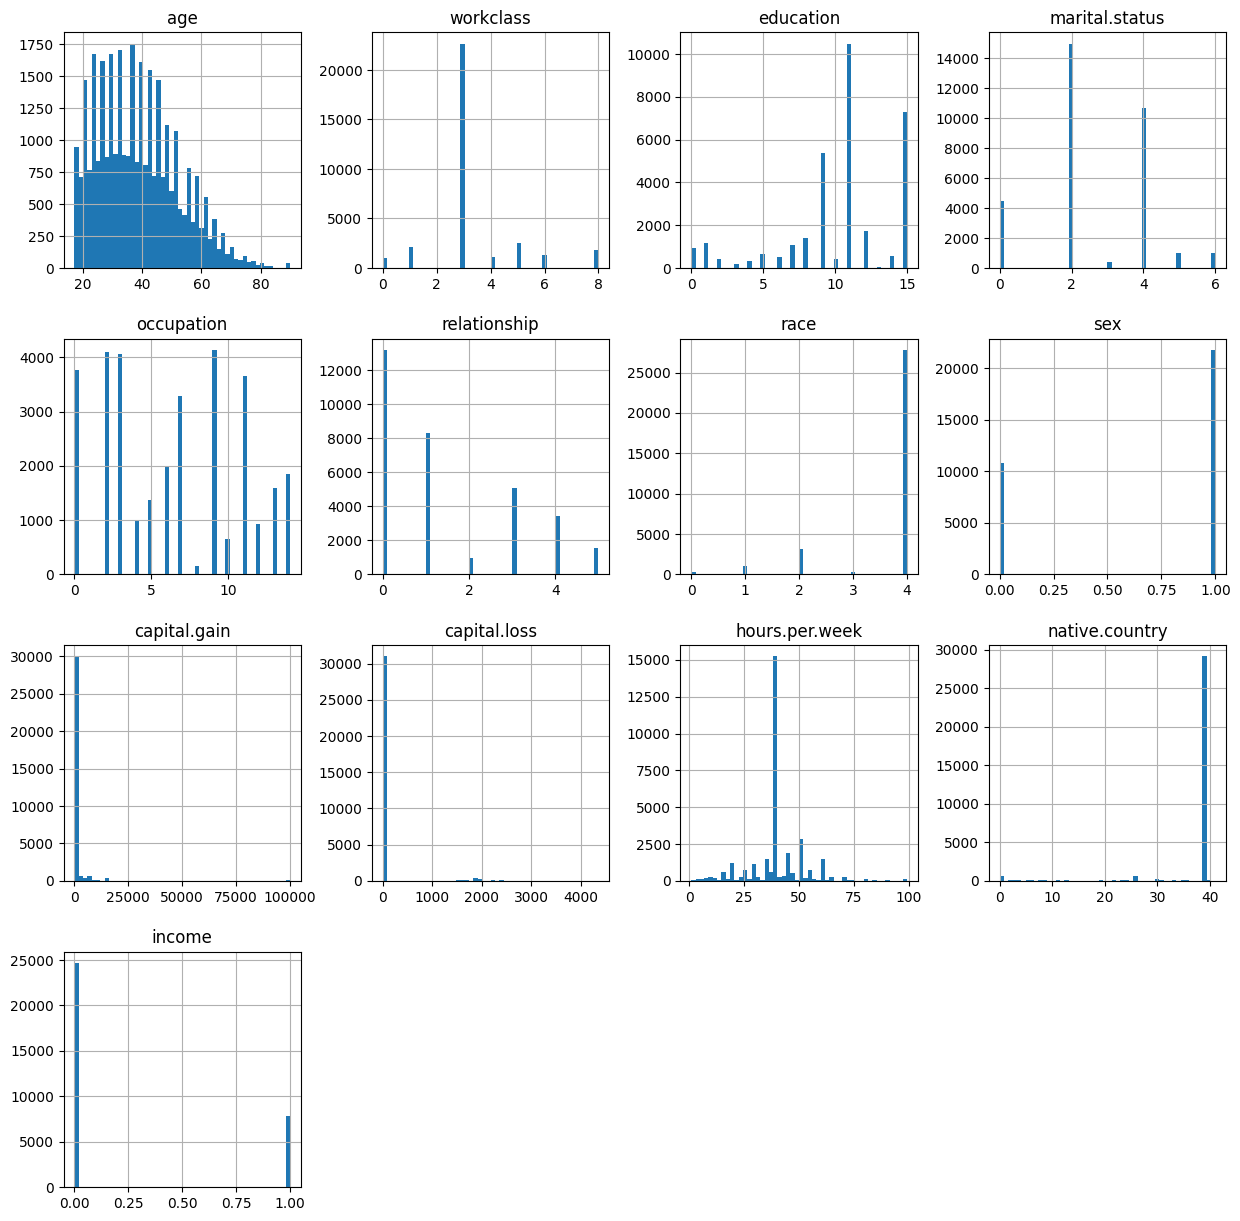

In [16]:
df.hist(bins=50,figsize=(15,15))
plt.show()

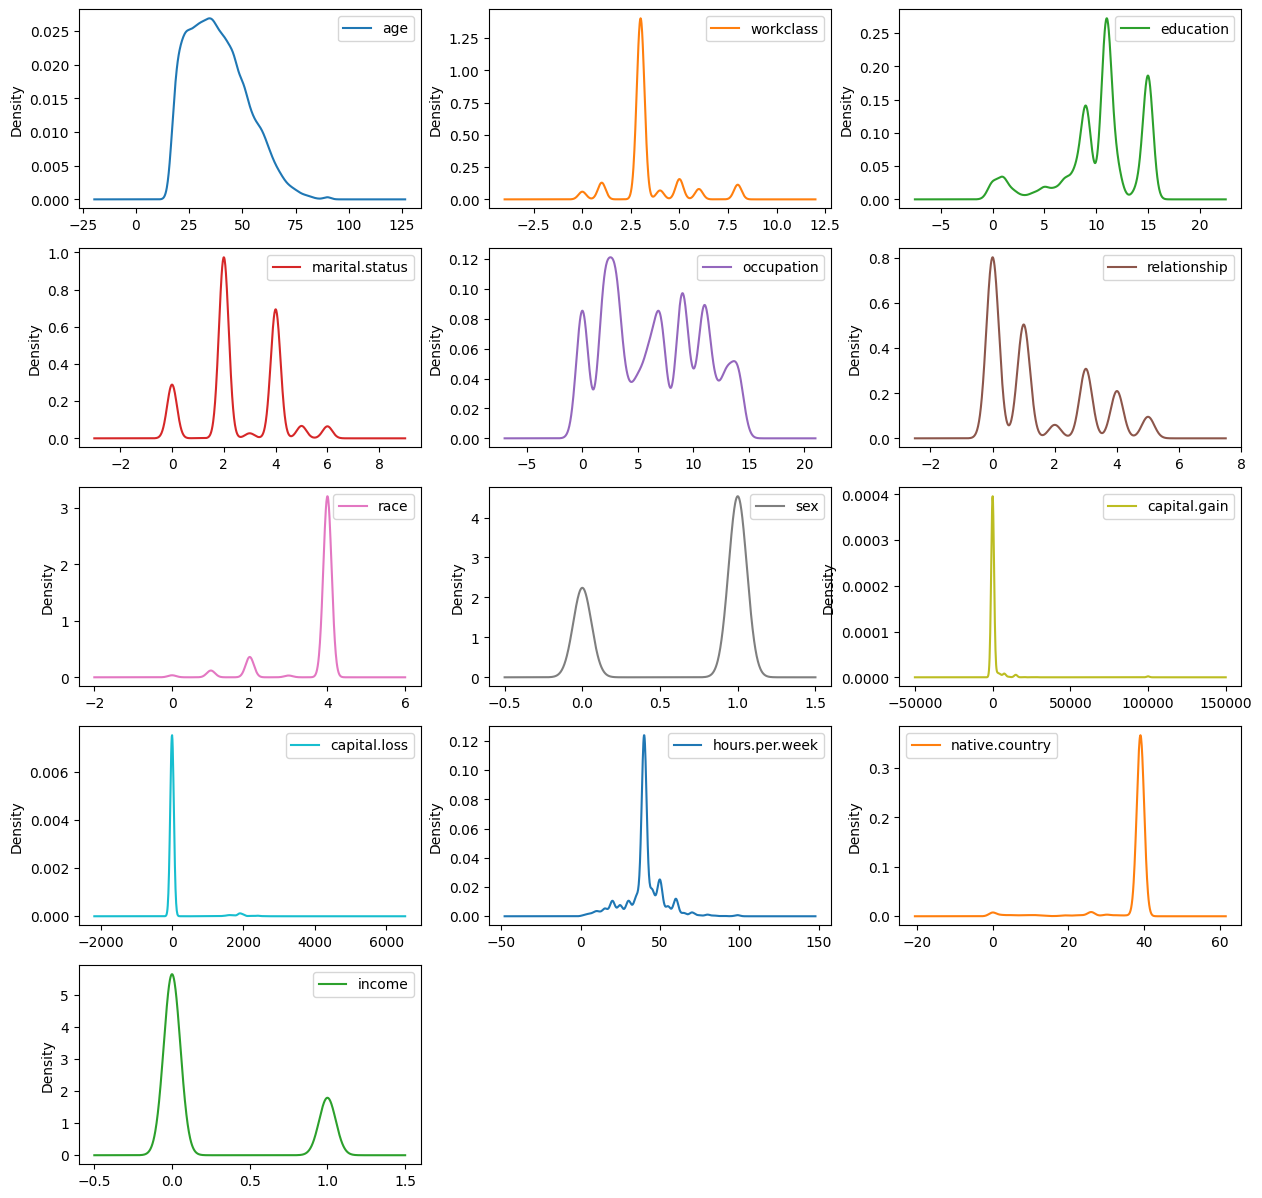

In [17]:
df.plot(kind="density",subplots=True,layout=(5,3),sharex=False,figsize=(15,15))
plt.show()

In [18]:
df

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,8,11,6,14,1,4,0,0,4356,40,39,0
1,82,3,11,6,3,1,4,0,0,4356,18,39,0
2,66,8,15,6,14,4,2,0,0,4356,40,39,0
3,54,3,5,0,6,4,4,0,0,3900,40,39,0
4,41,3,15,5,9,3,4,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,15,4,10,1,4,1,0,0,40,39,0
32557,27,3,7,2,12,5,4,0,0,0,38,39,0
32558,40,3,11,2,6,0,4,1,0,0,40,39,1
32559,58,3,11,6,0,4,4,0,0,0,40,39,0


In [19]:
#x and y partition
x=df.drop('income',axis=1)
y=df['income']

#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

### LOGISTIC REGRESSION

In [20]:

from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)

#predictions
y_pred_train= model1.predict(x_train)
y_pred_test=model1.predict(x_test)

#evolutions
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)

print("train_accuracy",train_acc)
print('test_accuracy',test_acc)
from sklearn.model_selection import cross_val_score
print("cross_val_score",cross_val_score(model1,x,y,cv=5).mean())


train_accuracy 0.8009912021207115
test_accuracy 0.7959434542102028
cross_val_score 0.768109271760571


## K nearest Neighbours

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=21,p=1)
model2.fit(x_train,y_train)

#predictions 
y_pred_train2=model2.predict(x_train)
y_pred_test2=model2.predict(x_test)


#evolutions
train_acc2=accuracy_score(y_train,y_pred_train2)
test_acc2=accuracy_score(y_test,y_pred_test2)

print("train_accuracy",train_acc2)
print("test_accuracy",test_acc2)
print("cross_val_score",cross_val_score(model2,x,y,cv=5).mean())

train_accuracy 0.8668024126935341
test_accuracy 0.8460356484326982
cross_val_score 0.7842170348626495


In [ ]:
#hyper paramerter tuning 
from sklearn.model_selection import GridSearchCV
estimator=KNeighborsClassifier()
param_grid={"n_neighbors":list(range(1,30)),"p":[1,2]}
grid=GridSearchCV(estimator,param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

In [24]:
precision=precision_score(y_train,y_pred_train2)
recall=recall_score(y_train,y_pred_train2)
f1=f1_score(y_train,y_pred_train2)
print("precision",precision)
print("recall",recall)
print("f1_score",f1)

precision 0.7655146075997709
recall 0.6416453265044815
f1_score 0.6981279930343927


## Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(criterion="gini",max_depth=5,splitter="best")
model3.fit(x_train,y_train)

#predictions
y_pred_train3=model3.predict(x_train)
y_pred_test3=model3.predict(x_test)

#evolution
train_acc3=accuracy_score(y_train,y_pred_train3)
test_acc3=accuracy_score(y_test,y_pred_test3)
print("train_accuracy",train_acc3)
print("testt_accuracy",test_acc3)

from sklearn.model_selection import cross_val_score
print("cross_val_score", cross_val_score(model3,x,y,cv=5).mean())




train_accuracy 0.8333397364478082
testt_accuracy 0.8311309157959434
cross_val_score 0.7731202244587623


In [26]:
#testing metrics
precision=precision_score(y_train,y_pred_train3)
recall=recall_score(y_train,y_pred_train3)
f1=f1_score(y_train,y_pred_train3)
print("precision", precision)
print("recall", recall)
print("f1_score",f1)

precision 0.7292366778684589
recall 0.48623559539052497
f1_score 0.5834453620126753


In [ ]:
#Hyper parameter tuning
estimator=DecisionTreeClassifier()
param_grid={"criterion":["gini","entropy"],"max_depth":list(range(1,6)),"splitter":["best","random"]}
grid=GridSearchCV(estimator,param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

## Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier(criterion="gini",max_depth=7)
model4.fit(x_train,y_train)

# predictions
y_pred_train4=model4.predict(x_train)
y_pred_test4=model4.predict(x_test)

#evolutions
train_acc4=accuracy_score(y_train,y_pred_train4)
test_acc4=accuracy_score(y_test,y_pred_test4)

from sklearn.model_selection import cross_val_score
print("cross_val_score", cross_val_score(model4,x,y,cv=5).mean())
print("train_accuracy",train_acc4)
print("test_accuracy",test_acc4)


cross_val_score 0.7792667090398322
train_accuracy 0.8479004187636866
test_accuracy 0.8414259373079287


In [ ]:
#hyper parameter tuning
estimator=RandomForestClassifier()
param_grid={"criterion":["gini","entropy"],"max_depth":[1,2,3,4,5,6,7]}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
grid.fit(x_train,y_train)
grid.best_params_


In [28]:
precision=precision_score(y_train,y_pred_train4)
recall=recall_score(y_train,y_pred_train4)
f1=f1_score(y_train,y_pred_train4)
print("precision",precision)
print("recall",recall)
print("f1_score",f1)

precision 0.8639109697933227
recall 0.43485915492957744
f1_score 0.5785159161077398


## adaboost classifier

In [41]:
from sklearn.ensemble import AdaBoostClassifier
model5=AdaBoostClassifier(n_estimators=41)
model5.fit(x_train,y_train)


#predictions
y_pred_train5=model5.predict(x_train)
y_pred_test5=model5.predict(x_test)

#evolution
train_acc5=accuracy_score(y_train,y_pred_train5)
test_acc5=accuracy_score(y_test,y_pred_test5)

print("cross_val_score",cross_val_score(model5,x,y,cv=5).mean())
print("train accuracy",train_acc5)
print("test accuracy",test_acc5)


cross_val_score 0.8035183423572307
train accuracy 0.8595028621921703
test accuracy 0.8558696988322065


In [31]:
##hyper parameter tuning
from sklearn.model_selection import GridSearchCV
estimator=AdaBoostClassifier()
param_grid={"n_estimators":list(range(1,50))}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
grid.fit(x_train,y_train)
grid.best_params_

{'n_estimators': 41}

In [42]:
precision=precision_score(y_train,y_pred_train5)
recall=recall_score(y_train,y_pred_train5)
f1=f1_score(y_train,y_pred_train5)
print("precision",precision)
print("recall",recall)
print("f1_score",f1)

precision 0.7629389080576415
recall 0.6016325224071702
f1_score 0.672751677852349


## Gradient BoostingClassifier

In [ ]:
## Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier
model6=GradientBoostingClassifier(learning_rate=0.4)
model6.fit(x_train,y_train)

#predictions
y_pred_train6=model6.predict(x_train)
y_pred_test6=model6.predict(x_test)

#evolutions
train_acc6 =accuracy_score(y_train,y_pred_train6)
test_acc6=accuracy_score(y_test,y_pred_test6)

print("cross_val_score",cross_val_score(model6,x,y,cv=5).mean())
print("train accuracy",train_acc6)
print("test accuracy",test_acc6)

In [ ]:
estimator=GradientBoostingClassifier()
param_grid={"learning_rate":[0.1,0.2,0.3,0.4,0.8,0.9,1]}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
grid.fit(x_train,y_train)
grid.best_params_

In [ ]:
precision=precision_score(y_train,y_pred_train6)
recall=recall_score(y_train,y_pred_train6)
f1=f1_score(y_train,y_pred_train6)
print("precision",precision)
print("recall",recall)
print("f1_score",f1)

## XGBoosting Classifier

In [ ]:
!pip install xgboost

In [ ]:
 from xgboost import XGBClassifier
model7=XGBClassifier(n_estimators=29,random_state=1)
model7.fit(x_train,y_train)

#predictions
y_pred_train7=model7.predict(x_train)
y_pred_test7=model7.predict(x_test)

#evolution 
train_acc7=accuracy_score(y_train,y_pred_train7)
test_acc7=accuracy_score(y_test,y_pred_test7)

print("cross_val_score",cross_val_score(model7,x,y,cv=5).mean())
print("train_accuracy",train_acc7)
print("test_accuracy",test_acc7)

In [ ]:
from sklearn.model_selection import GridSearchCV
estimator=XGBClassifier()
param_grid={"random_state":list(range(1,5)),"n_estimators":list(range(1,30))}
grid=GridSearchCV(estimator,param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

In [ ]:
precision=precision_score(y_train,y_pred_train7)
recall=recall_score(y_train,y_pred_train7)
f1=f1_score(y_train,y_pred_train7)
print("precision",precision)
print("recall",recall)
print("f1_score",f1)

for the purpose of testing we have used the sample data to find the models accuracy and performance

In [32]:
input_data={ "age":90,
            "workclass":"State-gov",
            "education":"Some-college",
            "marital.status":"Widowed",
            "occupation":"others",
            "relationship":"Not-in-family ",
            "race":"white",
            "sex":"Female",
            "capital.gain":0,
            "capital.loss":4356,
            "hours.per.week":25,
            "native.country":20}

In [33]:
input_data

{'age': 90,
 'workclass': 'State-gov',
 'education': 'Some-college',
 'marital.status': 'Widowed',
 'occupation': 'others',
 'relationship': 'Not-in-family ',
 'race': 'white',
 'sex': 'Female',
 'capital.gain': 0,
 'capital.loss': 4356,
 'hours.per.week': 25,
 'native.country': 20}

##### Below are the encoded values for each categorical type of column .

In [37]:
# Replacement dictionaries
workclass_replacement = {
    "Federal-gov": 0,
    "Local-gov": 1,
    "Never-worked": 2,
    "Private": 3,
    "Self-emp-inc": 4,
    "Self-emp-not-inc": 5,
    "State-gov": 6,
    "Without-pay": 7,
    "others": 8
}

education_replacement = {
    "HS-grad": 9,
    "Some-college": 10,
    "Bachelors": 13,
    "Masters": 14,
    "Assoc-voc": 11,
    "11th": 7,
    "Assoc-acdm": 12,
    "10th": 6,
    "7th-8th": 4,
    "Prof-school": 15,
    "9th": 5,
    "12th": 8,
    "Doctorate": 16,
    "5th-6th": 3,
    "1st-4th": 2,
    "Preschool": 1
}

marital_status_replacement = {
    "Married-civ-spouse": 2,
    "Never-married": 4,
    "Divorced": 0,
    "Separated": 5,
    "Widowed": 6,
    "Married-spouse-absent": 3,
    "Married-AF-spouse": 1
}

occupation_replacement = {
    "Prof-specialty": 9,
    "Craft-repair": 2,
    "Exec-managerial": 3,
    "Adm-clerical": 0,
    "Sales": 11,
    "Other-service": 7,
    "Machine-op-inspct": 6,
    "others": 14,
    "Transport-moving": 13,
    "Handlers-cleaners": 5,
    "Farming-fishing": 4,
    "Tech-support": 12,
    "Protective-serv": 10,
    "Priv-house-serv": 8,
    "Armed-Forces": 1
}

relationship_replacement = {
    "Husband": 0,
    "Not-in-family": 1,
    "Own-child": 3,
    "Unmarried": 4,
    "Wife": 5,
    "Other-relative": 2
}

race_replacement = {
    "White": 4,
    "Black": 2,
    "Asian-Pac-Islander": 1,
    "Amer-Indian-Eskimo": 0,
    "Other": 3
}

sex_replacement = {"Male": 1, "Female": 0}

# Input data
input_data = {
    "age": 90,
    "workclass": "State-gov",
    "education": "Some-college",
    "marital.status": "Widowed",
    "occupation": "others",
    "relationship": "Not-in-family",
    "race": "White",
    "sex": "Female",
    "capital.gain": 0,
    "capital.loss": 4356,
    "hours.per.week": 25,
    "native.country": 20
}
native_country_replacement={
      "Cambodia":0,
      "Canada":1,
      "China":2,
      "Columbia":3,
      "Cuba":4,
     "Dominican Republic":5,
      "Ecuador":6,
      "El Salvadorr":7,
      "England":8,
      "France":9,
      "Germany":10,
      "Greece":11,
      "Guatemala":12,
      "Haiti":13,
      "Netherlands":14,
      "Honduras":15,
      "HongKong":16,
      "Hungary":17,
      "India":18,
      "Iran":19,
      "Ireland":20,
     " Italy":21,
      "Jamaica":22,
       "Japan":23,
      "Laos":24,
      "Mexico":25,
      "Nicaragua":26,
      "Outlying-US(Guam-USVI-etc)":27,
     " Peru":28,
     " Philippines":29,
     "Poland":30,
     " Portugal":31,
      "Puerto-Rico":32,
      "Scotland":33,
      "South":34,
      "Taiwan":35,
      "Thailand":36,
     "Trinadad&Tobago":37,
      "United States":38,
      "Vietnam":39,
     " Yugoslavia":40}

# Apply replacements
input_data["workclass"] = workclass_replacement.get(input_data["workclass"], input_data["workclass"])
input_data["education"] = education_replacement.get(input_data["education"], input_data["education"])
input_data["marital.status"] = marital_status_replacement.get(input_data["marital.status"], input_data["marital.status"])
input_data["occupation"] = occupation_replacement.get(input_data["occupation"], input_data["occupation"])
input_data["relationship"] = relationship_replacement.get(input_data["relationship"], input_data["relationship"])
input_data["race"] = race_replacement.get(input_data["race"], input_data["race"])
input_data["sex"] = sex_replacement.get(input_data["sex"], input_data["sex"])
input_data["native.country"] = native_country_replacement.get(input_data["native.country"], input_data["native.country"])
# Convert dictionary values to list
values_list = list(input_data.values())




In [35]:
import joblib
joblib.dump(model3,open("dtree.joblib","wb")) 

##### sample testing of model using unique values values 

In [38]:
model3.predict([values_list])

array([1])

In [39]:
print(model3.predict([[40,4,11,2,6,0,4,1,0,0,40,39]]))

[0]


In [ ]:
print(model3.predict([[74,6,10,4,9,2,4,0,0,3683,20,39]]))

In [ ]:
print(model3.predict([[90,8,11,6,14,1,4,0,0,4356,40,39]]))